### Table of contents <a id='menu'>

* [0. Data Collected](#dc)
* [1. Data Validation & Cleaning](#dvc)
     
    @ Insights
* [2. EDA](#eda)
    
    @Predictive Modelling
* [3. x,y](#xy)
* [4. Feature Selection of X](#fsox)
* [5. Train-Test split](#tts)
* [6. Na & Out of Train & Test](#nott)
* [7. Pre-Processing of xtrain & xtest](#ppxt)
* [8. Selecting the Predictive Model](#mod)
* [9. Model Performance](#mp)
* [10. Real Time Predictions](#rtp)
### Data Validation

In [1]:
# Data Mining
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

### 0. Data Collected <a id='dc'>
    
[Back to Top](#menu)

* The collected No_broker_House_Rental dataset we will check each and every column data properly

In [2]:
# Loading Dataset
data = pd.read_csv("No_Broker_House_Rental.csv")

In [3]:
data.columns

Index(['Rent ', 'Location', 'Square_feets ', 'BHK', 'Facing', 'Furnish',
       'Bathroom', 'Floor', 'Property_type', 'Deposit', 'Property_age',
       'Gated_security', 'Nonveg_allowed', 'Parking'],
      dtype='object')

In [4]:
data.head()

,Rent,Location,Square_feets,BHK,Facing,Furnish,Bathroom,Floor,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,"?25,000/M",Hyderabad,800,2 Bedroom,NaN,Semi,2,03-Apr,Apartment,"? 50,000",3-5 Years,No,Yes,Bike and Car
1,"?12,000/M",Hyderabad,"1,100",2 Bedroom,NaN,Unfurnished,2,01-Feb,Apartment,"? 24,000",5-10 Years,No,Yes,Bike
2,"?89,998/M",Hyderabad,"2,810",3 Bedroom,North,Semi,4,Dec-15,Apartment,? 1,1-3 Years,No,Yes,Bike and Car
3,"?20,000/M",Hyderabad,"1,080",2 Bedroom,North,Semi,2,03-May,Apartment,"? 60,000",>10 Years,No,Yes,Car
4,"?6,500/M",Hyderabad,750,1 Bedroom,West,Unfurnished,1,01-Jan,Independent House/villa,"? 6,500",1-3 Years,Yes,Yes,Bike


Column|Description
-----------|--------
Rent|Find properties within your specified budget range.
Location|Find properties in various areas.
Square_feets|Explore properties based on their size in square feets.
Bhk|Look for properties based on the number of bedrooms, hall, and kitchen.
Facing|Filter properties based on their direction or facing.
Furnish|Check if properties come furnished or unfurnished.
Bathroom|View properties based on the number of bathrooms available.
Floor|Identify properties based on the floor they are situated on.
Property_type| Browse properties based on their type (apartment, villa, independent house, etc.).
Deposit|Identify properties based on their security deposit requirements.
Property_age| Find properties based on their age or year of construction.
Gated_security| Filter properties that offer gated security.
Nonveg_allowed| Identify properties that allow/non-allowance for non-vegetarian food.
Parking| Find properties with available parking spaces.

**Basic Checks of House_Rental Dataset**

In [5]:
data.shape

(569, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rent            569 non-null    object
 1   Location        569 non-null    object
 2   Square_feets    569 non-null    object
 3   BHK             569 non-null    object
 4   Facing          321 non-null    object
 5   Furnish         569 non-null    object
 6   Bathroom        569 non-null    int64 
 7   Floor           569 non-null    object
 8   Property_type   569 non-null    object
 9   Deposit         569 non-null    object
 10  Property_age    569 non-null    object
 11  Gated_security  569 non-null    object
 12  Nonveg_allowed  569 non-null    object
 13  Parking         569 non-null    object
dtypes: int64(1), object(13)
memory usage: 62.4+ KB


In [7]:
print("First five rows of Data: ")
display(data.head())
print()
print("Last Five rows of Data: ")
display(data.tail())

First five rows of Data: 


,Rent,Location,Square_feets,BHK,Facing,Furnish,Bathroom,Floor,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,"?25,000/M",Hyderabad,800,2 Bedroom,NaN,Semi,2,03-Apr,Apartment,"? 50,000",3-5 Years,No,Yes,Bike and Car
1,"?12,000/M",Hyderabad,"1,100",2 Bedroom,NaN,Unfurnished,2,01-Feb,Apartment,"? 24,000",5-10 Years,No,Yes,Bike
2,"?89,998/M",Hyderabad,"2,810",3 Bedroom,North,Semi,4,Dec-15,Apartment,? 1,1-3 Years,No,Yes,Bike and Car
3,"?20,000/M",Hyderabad,"1,080",2 Bedroom,North,Semi,2,03-May,Apartment,"? 60,000",>10 Years,No,Yes,Car
4,"?6,500/M",Hyderabad,750,1 Bedroom,West,Unfurnished,1,01-Jan,Independent House/villa,"? 6,500",1-3 Years,Yes,Yes,Bike



Last Five rows of Data: 


,Rent,Location,Square_feets,BHK,Facing,Furnish,Bathroom,Floor,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
564,"?25,000/M",Ameerpet,"1,185",2 Bedroom,South,Full,2,01-May,Apartment,"? 50,000",>10 Years,Yes,Yes,Bike and Car
565,"?21,000/M",Ameerpet,900,2 Bedroom,East,Full,2,0/3,Apartment,"? 63,000",>10 Years,No,Yes,Bike
566,"?19,000/M",Ameerpet,750,2 Bedroom,North,Unfurnished,2,0/3,Independent House/villa,"? 19,000",1-3 Years,No,Yes,Bike and Car
567,"?6,500/M",Ameerpet,400,1 Bedroom,East,Unfurnished,1,03-Mar,Apartment,"? 13,000",>10 Years,No,Yes,Bike
568,"?12,000/M",Ameerpet,500,1 Bedroom,North,Unfurnished,1,01-Feb,Independent House/villa,"? 24,000",3-5 Years,Yes,Yes,Bike


**Handling Duplicates**
* Convert categorical columns into lower case for the duplicates check

Note:
* You need to check duplicates before data validation and after data validation

In [8]:
# converting categorical columns to lower
for i in data.columns:
    if data[i].dtype == object:
        data[i] = data[i].str.lower()

In [9]:
data[data.duplicated()] 

,Rent,Location,Square_feets,BHK,Facing,Furnish,Bathroom,Floor,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking


In [10]:
data = data.drop_duplicates().reset_index(drop=True)

In [11]:
data[data.duplicated()] 

,Rent,Location,Square_feets,BHK,Facing,Furnish,Bathroom,Floor,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking


**Checking Missing values**

In [12]:
data.isnull().sum()

Rent                0
Location            0
Square_feets        0
BHK                 0
Facing            248
Furnish             0
Bathroom            0
Floor               0
Property_type       0
Deposit             0
Property_age        0
Gated_security      0
Nonveg_allowed      0
Parking             0
dtype: int64

**Deleting the Facing Column**

In [13]:
del data['Facing']

### 1. Data Validation & Cleaning <a id='dvc'>
[Back to top](#menu)

**Checking each and every column data**
* We are using string methods for this entire analysis

In [14]:
# converting categorical columns to lower
for i in data.columns:
    if data[i].dtype == object:
        data[i] = data[i].str.lower()

* Here i am Modifying the BHK, Rent, Square_feets column names and columns data 

In [15]:
data.rename(columns={'BHK':"Bhk",'Rent ':'Rent','Square_feets ':'Square_feets'},inplace = True)

In [16]:
for col in data.columns:
    print("Column:", col)
    print()
    print("Unique Data: ")
    print()
    print(data[col].unique())
    print()

Column: Rent

Unique Data: 

['?25,000/m' '?12,000/m' '?89,998/m' '?20,000/m' '?6,500/m' '?36,000/m'
 '?26,000/m' '?8,000/m' '?27,000/m' '?16,500/m' '?40,000/m' '?1,05,000/m'
 '?15,000/m' '?9,000/m' '?10,000/m' '?50,000/m' '?60,000/m' '?17,000/m'
 '?16,000/m' '?29,000/m' '?48,000/m' '?18,000/m' '?33,000/m'
 'deposit only' '?1,75,000/m' '?30,000/m' '?18,500/m' '?1,30,000/m'
 '?35,000/m' '?21,000/m' '?13,000/m' '?31,000/m' '?43,000/m' '?19,000/m'
 '?45,000/m' '?34,000/m' '?13,500/m' '?80,000/m' '?90,000/m' '?14,000/m'
 '?32,000/m' '?23,000/m' '?4,000/m' '?49,000/m' '?28,000/m' '?22,000/m'
 '?7,000/m' '?11,500/m' '?47,500/m' '?7,500/m' '?6,000/m' '?17,500/m'
 '?14,500/m' '?8,500/m' '?70,000/m' '?5,500/m' '?10,500/m' '?3,500/m'
 '?9,500/m' '?11,000/m' '?3,000/m' '?5,000/m' '?5,300/m' '?75,000/m'
 '?55,000/m' '?21,500/m' '?24,000/m' '?38,000/m' '?2,50,000/m' '?42,000/m'
 '?4,500/m' '?65,000/m' '?2,00,000/m' '?9,300/m' '?12,500/m' '?1,10,000/m'
 '?15,500/m' '?20,500/m' '?8,200/m']

Column: L

**Rent**

In [17]:
data.Rent = data.Rent.str.strip("?").str.replace(",","").str.replace("/m","")

In [18]:
data.Rent = data.Rent.str.replace("deposit only","20000")

In [19]:
data.Rent= data.Rent.astype(int)

In [20]:
data.Rent.unique(),data.Rent.nunique(),data.Rent.dtype

(array([ 25000,  12000,  89998,  20000,   6500,  36000,  26000,   8000,
         27000,  16500,  40000, 105000,  15000,   9000,  10000,  50000,
         60000,  17000,  16000,  29000,  48000,  18000,  33000, 175000,
         30000,  18500, 130000,  35000,  21000,  13000,  31000,  43000,
         19000,  45000,  34000,  13500,  80000,  90000,  14000,  32000,
         23000,   4000,  49000,  28000,  22000,   7000,  11500,  47500,
          7500,   6000,  17500,  14500,   8500,  70000,   5500,  10500,
          3500,   9500,  11000,   3000,   5000,   5300,  75000,  55000,
         21500,  24000,  38000, 250000,  42000,   4500,  65000, 200000,
          9300,  12500, 110000,  15500,  20500,   8200]),
 78,
 dtype('int32'))

**Location**

In [21]:
data.Location.unique(),data.Location.nunique(),data.Location.dtype

(array(['hyderabad', 'madhapur', 'kukatpally ', 'hafeezpet', 'uppal',
        'kondapur', 'ameerpet'], dtype=object),
 7,
 dtype('O'))

**Square_feets**

In [22]:
data.Square_feets = data.Square_feets.str.replace(",","")

In [23]:
data.Square_feets = data.Square_feets.astype(int)

In [24]:
data.Square_feets.unique(),data.Square_feets.nunique(),data.Square_feets.dtype

(array([ 800, 1100, 2810, 1080,  750, 1850, 1500,  225,  980, 1190, 1525,
        1650, 3800,  900,  500,  650, 2500, 1200,  200, 3500, 2100,  850,
        1116,  300, 1749, 1283, 1660, 1560, 1050, 4300, 2000, 1495, 1640,
        1150, 1350, 1250,  965, 3000, 1000,  655,  400,  520, 1600,  610,
         450, 1277,  720, 1622,  350,  960,  600,  490, 1780,  120,  150,
        2048,  680,  950, 1750, 1300, 2235, 1514, 1575, 2200, 1900,  250,
        1842, 1135, 1428, 1400, 1672, 1410, 1740, 1592, 1450,  550, 1520,
         995, 1700, 1110,  430,   80,  280, 1615, 6480,  700, 1336, 1106,
         540, 1330, 1576,  420, 1130, 1480, 1875, 1908, 1550, 1865, 2150,
        1670,  202, 1810,  810, 4000, 1588, 2300, 2400,  160, 1206,  121,
        1800,   70,  240,  100, 2025, 5000, 3600,  244,  275, 1756, 3300,
        4670, 2110, 1120, 2138, 2490,  162, 3200, 1960,  339,  220, 1535,
         890, 1235,  495, 1140,  917, 1220,  303, 2160, 1070, 1185]),
 142,
 dtype('int32'))

**Bhk**

In [25]:
data.Bhk = data.Bhk.str.replace(",","").str.replace("bedroom","")

In [26]:
data.Bhk = data.Bhk.astype(int)

In [27]:
data.Bhk.unique(),data.Bhk.nunique(),data.Bhk.dtype

(array([2, 3, 1, 4]), 4, dtype('int32'))

**Furnish**

In [28]:
data.Furnish.unique(),data.Furnish.nunique(),data.Furnish.dtype

(array(['semi', 'unfurnished', 'full'], dtype=object), 3, dtype('O'))

**Bathroom**

In [29]:
data.Bathroom.unique(),data.Bathroom.nunique(),data.Bathroom.dtype

(array([ 2,  4,  1,  3,  5,  6,  7, 30], dtype=int64), 8, dtype('int64'))

**Floor**

In [30]:
data.Floor = data.Floor.str.replace("-","")

In [31]:
data.Floor.unique(),data.Floor.nunique(),data.Floor.dtype

(array(['03apr', '01feb', 'dec15', '03may', '01jan', '04may', '0/2', '0/5',
        '03mar', 'jun15', '04apr', '0/3', '0/0', '0/6', '01mar', '0/1',
        '02feb', '02mar', '02apr', '07jul', '32/34', 'jun14', 'mar15',
        '01may', '01apr', '07aug', 'apr14', '03dec', '05may', 'jul13',
        '03nov', 'mar18', 'feb13', '05jun', 'jun13', 'apr15', '05dec',
        '03jun', '02may', '03jul', '02dec', '0/7', '06jun', 'may32',
        'jan13', 'feb18', '0/4', '30/32', '19/27', '02jun', '01sep',
        '01jun', '24/25', '02nov', '23/24', '01aug', '18/20', 'aug20',
        '04jul', 'jan14', 'may14', '04jun', '02aug', '03feb', 'may15'],
       dtype=object),
 65,
 dtype('O'))

In [32]:
del data['Floor']

**Property_type**

In [33]:
data.Property_type = data.Property_type.str.replace("/","_")

In [34]:
data.Property_type.unique(),data.Property_type.nunique(),data.Property_type.dtype

(array(['apartment', 'independent house_villa', 'gated community'],
       dtype=object),
 3,
 dtype('O'))

**Deposit**

In [35]:
data.Deposit = data.Deposit.str.strip("?").str.replace(",","")

In [36]:
data.Deposit = data.Deposit.astype(int)

In [37]:
data.Deposit.unique(),data.Deposit.nunique(),data.Deposit.dtype

(array([  50000,   24000,       1,   60000,    6500,   72000,   15000,
          12000,   52000,   33000,  100000,  200000,  300000,   40000,
          25000,   27000,   10000,  165000,   18000,   19500,  180000,
          84000,   34000,   32000,   30000,   87000,   96000,   38000,
         110000,   66000,   80000,   20000,  700000,  120000,  260000,
          70000,   45000,   26000,   13000,   86000,   42000,   90000,
         160000,  600000,   28000,  105000,   48000,   14000,    8000,
          56000,   75000,   44000,   46000,   11000,   63000,    4500,
          64000,  102000,   23000,       0,   19000,   95000,  210000,
          16000,   36000,   35000,   29000,    8500,   17000,   16500,
           5500,    3500,    7000,    6000,    7500,   21000,    5000,
           8600,  225000,  450000,  240000,   76000,   54000,  250000,
          74000,  150000, 1000000,   65000,  119997,  800000,    4000,
           9000,   78000,   68000,  390000,  400000,   27300,   64500,
      

**Property_age**

In [38]:
data.Property_age = data.Property_age.str.replace("years","").str.replace(">","")

In [39]:
data.Property_age.unique(),data.Property_age.nunique(),data.Property_age.dtype

(array(['3-5 ', '5-10 ', '1-3 ', '10 ', 'newly constructed',
        'under construction'], dtype=object),
 6,
 dtype('O'))

In [40]:
data.Property_age = data.Property_age.replace("3-5 ","above_3_years").replace("5-10 ","above_5_years").replace("1-3 ","above_1_year").replace("10 ","10_years")

**Gated_security**

In [41]:
data.Gated_security.unique(),data.Gated_security.nunique(),data.Gated_security.dtype

(array(['no', 'yes'], dtype=object), 2, dtype('O'))

**Nonveg_allowed**

In [42]:
data.Nonveg_allowed.unique(),data.Nonveg_allowed.nunique(),data.Nonveg_allowed.dtype

(array(['yes', 'no'], dtype=object), 2, dtype('O'))

**Parking**

In [43]:
data.Parking = data.Parking.str.replace(" ","_")

In [44]:
data.Parking.value_counts()

bike            265
bike_and_car    191
car              59
none             54
Name: Parking, dtype: int64

In [45]:
data.Parking.unique(),data.Parking.nunique(),data.Parking.dtype

(array(['bike_and_car', 'bike', 'car', 'none'], dtype=object), 4, dtype('O'))

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rent            569 non-null    int32 
 1   Location        569 non-null    object
 2   Square_feets    569 non-null    int32 
 3   Bhk             569 non-null    int32 
 4   Furnish         569 non-null    object
 5   Bathroom        569 non-null    int64 
 6   Property_type   569 non-null    object
 7   Deposit         569 non-null    int32 
 8   Property_age    569 non-null    object
 9   Gated_security  569 non-null    object
 10  Nonveg_allowed  569 non-null    object
 11  Parking         569 non-null    object
dtypes: int32(4), int64(1), object(7)
memory usage: 44.6+ KB


In [47]:
data.head(5)

,Rent,Location,Square_feets,Bhk,Furnish,Bathroom,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,25000,hyderabad,800,2,semi,2,apartment,50000,above_3_years,no,yes,bike_and_car
1,12000,hyderabad,1100,2,unfurnished,2,apartment,24000,above_5_years,no,yes,bike
2,89998,hyderabad,2810,3,semi,4,apartment,1,above_1_year,no,yes,bike_and_car
3,20000,hyderabad,1080,2,semi,2,apartment,60000,10_years,no,yes,car
4,6500,hyderabad,750,1,unfurnished,1,independent house_villa,6500,above_1_year,yes,yes,bike


### Data Understanding  
## 2. EDA (Exploratory Data Analysis): <a id='eda'>

[Back to Top](#menu)
* We can get insights on dataset using Exploratory Data Analysis (EDA) methods

* EDA can be of two things, 
    - Statistics
        - Descriptive
        - Inferential
    - Visual Analysis

In [48]:
data.head()

,Rent,Location,Square_feets,Bhk,Furnish,Bathroom,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,25000,hyderabad,800,2,semi,2,apartment,50000,above_3_years,no,yes,bike_and_car
1,12000,hyderabad,1100,2,unfurnished,2,apartment,24000,above_5_years,no,yes,bike
2,89998,hyderabad,2810,3,semi,4,apartment,1,above_1_year,no,yes,bike_and_car
3,20000,hyderabad,1080,2,semi,2,apartment,60000,10_years,no,yes,car
4,6500,hyderabad,750,1,unfurnished,1,independent house_villa,6500,above_1_year,yes,yes,bike


In [49]:
data.dtypes

Rent               int32
Location          object
Square_feets       int32
Bhk                int32
Furnish           object
Bathroom           int64
Property_type     object
Deposit            int32
Property_age      object
Gated_security    object
Nonveg_allowed    object
Parking           object
dtype: object

* Numerical and Categorical

Numerical | Categorical
--|---------------------
Rent | Location
Square_feets|Furnish
Bhk| Floor
Bathroom| Property_type
Deposit| Property_age
-|Gated_security
-|Nonveg_allowed
-|Parking

In [50]:
data.columns, data.dtypes

(Index(['Rent', 'Location', 'Square_feets', 'Bhk', 'Furnish', 'Bathroom',
        'Property_type', 'Deposit', 'Property_age', 'Gated_security',
        'Nonveg_allowed', 'Parking'],
       dtype='object'),
 Rent               int32
 Location          object
 Square_feets       int32
 Bhk                int32
 Furnish           object
 Bathroom           int64
 Property_type     object
 Deposit            int32
 Property_age      object
 Gated_security    object
 Nonveg_allowed    object
 Parking           object
 dtype: object)

In [51]:
data.Rent.describe()

count       569.000000
mean      22837.079086
std       21803.637073
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       30000.000000
max      250000.000000
Name: Rent, dtype: float64

In [52]:
data.Rent.value_counts(),data.Rent.median(),data.Rent.unique(),data.Rent.nunique()

(20000     40
 12000     35
 15000     31
 10000     30
 30000     26
           ..
 49000      1
 43000      1
 31000      1
 175000     1
 8200       1
 Name: Rent, Length: 78, dtype: int64,
 18000.0,
 array([ 25000,  12000,  89998,  20000,   6500,  36000,  26000,   8000,
         27000,  16500,  40000, 105000,  15000,   9000,  10000,  50000,
         60000,  17000,  16000,  29000,  48000,  18000,  33000, 175000,
         30000,  18500, 130000,  35000,  21000,  13000,  31000,  43000,
         19000,  45000,  34000,  13500,  80000,  90000,  14000,  32000,
         23000,   4000,  49000,  28000,  22000,   7000,  11500,  47500,
          7500,   6000,  17500,  14500,   8500,  70000,   5500,  10500,
          3500,   9500,  11000,   3000,   5000,   5300,  75000,  55000,
         21500,  24000,  38000, 250000,  42000,   4500,  65000, 200000,
          9300,  12500, 110000,  15500,  20500,   8200]),
 78)

In [53]:
data.Rent.mean(),data.Rent.median(),data.Rent.std()

(22837.07908611599, 18000.0, 21803.637073417318)

**Uni-Variate analysis on Categorical** 

In [54]:
data.Location.value_counts(),data.Location.mode()

(ameerpet       270
 madhapur        51
 kukatpally      50
 hafeezpet       50
 uppal           50
 kondapur        50
 hyderabad       48
 Name: Location, dtype: int64,
 0    ameerpet
 Name: Location, dtype: object)

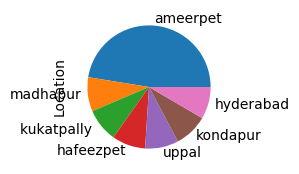

In [55]:
plt.figure(figsize=(3,2))
data['Location'].value_counts().plot(kind='pie')
plt.show()

* Ameerpet has highest value counts in location 

In [93]:
data.Furnish.value_counts(),data.Furnish.mode()

(unfurnished    275
 semi           194
 full           100
 Name: Furnish, dtype: int64,
 0    unfurnished
 Name: Furnish, dtype: object)

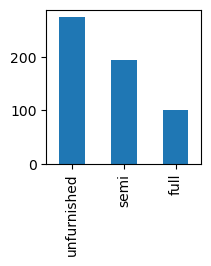

In [94]:
plt.figure(figsize=(2,2))
data['Furnish'].value_counts().plot(kind='bar')
plt.show()

* Unfurnished has highest value counts in the furnish

In [95]:
data.Property_type.value_counts(),data.Property_type.mode()

(apartment                  380
 independent house_villa    182
 gated community              7
 Name: Property_type, dtype: int64,
 0    apartment
 Name: Property_type, dtype: object)

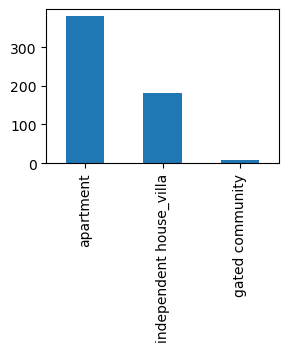

In [96]:
plt.figure(figsize=(3,2))
data['Property_type'].value_counts().plot(kind='bar')
plt.show()

* In property type the aparment has the highest value counts 

In [60]:
! pip install simple_colors

**Complete uni-variate Analysis**


Categorical/Numeric Discrete Column: Rent
Uni-Variate Descriptive Stats:
Classes: [ 25000  12000  89998  20000   6500  36000  26000   8000  27000  16500
  40000 105000  15000   9000  10000  50000  60000  17000  16000  29000
  48000  18000  33000 175000  30000  18500 130000  35000  21000  13000
  31000  43000  19000  45000  34000  13500  80000  90000  14000  32000
  23000   4000  49000  28000  22000   7000  11500  47500   7500   6000
  17500  14500   8500  70000   5500  10500   3500   9500  11000   3000
   5000   5300  75000  55000  21500  24000  38000 250000  42000   4500
  65000 200000   9300  12500 110000  15500  20500   8200]
Number of Classes: 78
Value Counts of each class: 20000     40
12000     35
15000     31
10000     30
30000     26
          ..
49000      1
43000      1
31000      1
175000     1
8200       1
Name: Rent, Length: 78, dtype: int64
Class Percent:
20000     7.029877
12000     6.151142
15000     5.448155
10000     5.272408
30000     4.569420
            ...   
490

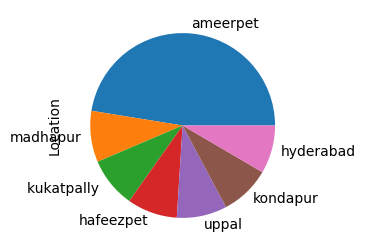


Categorical/Numeric Discrete Column: Square_feets
Uni-Variate Descriptive Stats:
Classes: [ 800 1100 2810 1080  750 1850 1500  225  980 1190 1525 1650 3800  900
  500  650 2500 1200  200 3500 2100  850 1116  300 1749 1283 1660 1560
 1050 4300 2000 1495 1640 1150 1350 1250  965 3000 1000  655  400  520
 1600  610  450 1277  720 1622  350  960  600  490 1780  120  150 2048
  680  950 1750 1300 2235 1514 1575 2200 1900  250 1842 1135 1428 1400
 1672 1410 1740 1592 1450  550 1520  995 1700 1110  430   80  280 1615
 6480  700 1336 1106  540 1330 1576  420 1130 1480 1875 1908 1550 1865
 2150 1670  202 1810  810 4000 1588 2300 2400  160 1206  121 1800   70
  240  100 2025 5000 3600  244  275 1756 3300 4670 2110 1120 2138 2490
  162 3200 1960  339  220 1535  890 1235  495 1140  917 1220  303 2160
 1070 1185]
Number of Classes: 142
Value Counts of each class: 500     59
1000    33
800     31
1200    26
200     23
        ..
1740     1
1672     1
1428     1
1135     1
1185     1
Name: Square_fe

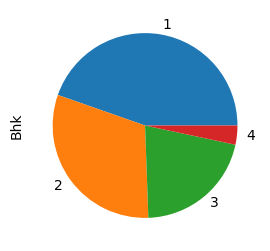


Categorical/Numeric Discrete Column: Furnish
Uni-Variate Descriptive Stats:
Classes: ['semi' 'unfurnished' 'full']
Number of Classes: 3
Value Counts of each class: unfurnished    275
semi           194
full           100
Name: Furnish, dtype: int64
Class Percent:
unfurnished    48.330404
semi           34.094903
full           17.574692
Name: Furnish, dtype: float64
---------------------------------------------------
Mode Value: unfurnished

Visual Analysis:
-----------------------------------------------------


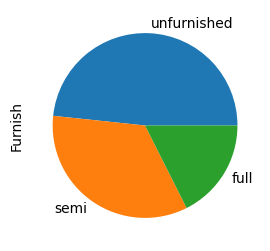


Categorical/Numeric Discrete Column: Bathroom
Uni-Variate Descriptive Stats:
Classes: [ 2  4  1  3  5  6  7 30]
Number of Classes: 8
Value Counts of each class: 1     266
2     197
3      88
4      10
5       4
6       2
7       1
30      1
Name: Bathroom, dtype: int64
Class Percent:
1     46.748682
2     34.622144
3     15.465729
4      1.757469
5      0.702988
6      0.351494
7      0.175747
30     0.175747
Name: Bathroom, dtype: float64
---------------------------------------------------
Mode Value: 1

Visual Analysis:
-----------------------------------------------------


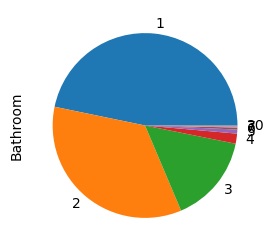


Categorical/Numeric Discrete Column: Property_type
Uni-Variate Descriptive Stats:
Classes: ['apartment' 'independent house_villa' 'gated community']
Number of Classes: 3
Value Counts of each class: apartment                  380
independent house_villa    182
gated community              7
Name: Property_type, dtype: int64
Class Percent:
apartment                  66.783831
independent house_villa    31.985940
gated community             1.230228
Name: Property_type, dtype: float64
---------------------------------------------------
Mode Value: apartment

Visual Analysis:
-----------------------------------------------------


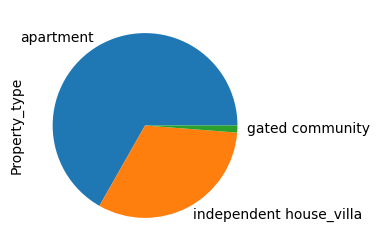


Categorical/Numeric Discrete Column: Deposit
Uni-Variate Descriptive Stats:
Classes: [  50000   24000       1   60000    6500   72000   15000   12000   52000
   33000  100000  200000  300000   40000   25000   27000   10000  165000
   18000   19500  180000   84000   34000   32000   30000   87000   96000
   38000  110000   66000   80000   20000  700000  120000  260000   70000
   45000   26000   13000   86000   42000   90000  160000  600000   28000
  105000   48000   14000    8000   56000   75000   44000   46000   11000
   63000    4500   64000  102000   23000       0   19000   95000  210000
   16000   36000   35000   29000    8500   17000   16500    5500    3500
    7000    6000    7500   21000    5000    8600  225000  450000  240000
   76000   54000  250000   74000  150000 1000000   65000  119997  800000
    4000    9000   78000   68000  390000  400000   27300   64500   51000
  330000  108000   22000 1800000    9500   20500   55000    8200    3000]
Number of Classes: 108
Value Counts o

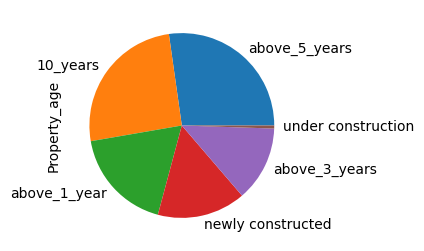


Categorical/Numeric Discrete Column: Gated_security
Uni-Variate Descriptive Stats:
Classes: ['no' 'yes']
Number of Classes: 2
Value Counts of each class: no     298
yes    271
Name: Gated_security, dtype: int64
Class Percent:
no     52.372583
yes    47.627417
Name: Gated_security, dtype: float64
---------------------------------------------------
Mode Value: no

Visual Analysis:
-----------------------------------------------------


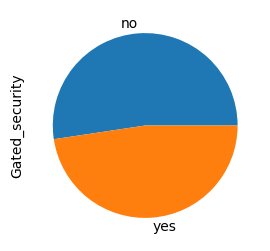


Categorical/Numeric Discrete Column: Nonveg_allowed
Uni-Variate Descriptive Stats:
Classes: ['yes' 'no']
Number of Classes: 2
Value Counts of each class: yes    545
no      24
Name: Nonveg_allowed, dtype: int64
Class Percent:
yes    95.782074
no      4.217926
Name: Nonveg_allowed, dtype: float64
---------------------------------------------------
Mode Value: yes

Visual Analysis:
-----------------------------------------------------


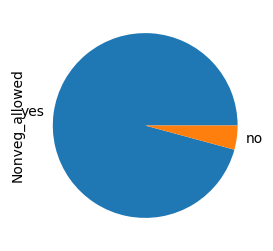


Categorical/Numeric Discrete Column: Parking
Uni-Variate Descriptive Stats:
Classes: ['bike_and_car' 'bike' 'car' 'none']
Number of Classes: 4
Value Counts of each class: bike            265
bike_and_car    191
car              59
none             54
Name: Parking, dtype: int64
Class Percent:
bike            46.572935
bike_and_car    33.567663
car             10.369069
none             9.490334
Name: Parking, dtype: float64
---------------------------------------------------
Mode Value: bike

Visual Analysis:
-----------------------------------------------------


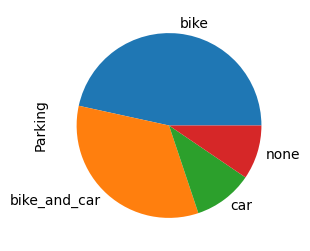

In [61]:
from simple_colors import *

for i in data.columns:
    if data[i].dtype == 'object' or data[i].dtype == 'int32' or data[i].dtype == 'int64':
        print()
        print(cyan("Categorical/Numeric Discrete Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(black("Classes:", ['bold']), data[i].unique())
        print(black("Number of Classes:", ['bold']), data[i].nunique())
        print(black("Value Counts of each class:", ['bold']),data[i].value_counts())
        print(black('Class Percent:', ['bold']))
        print((data[i].value_counts() / data[i].value_counts().sum()) * 100)
        print("---------------------------------------------------")
        print(black("Mode Value:", ['bold']), data[i].mode()[0])
        if data[i].nunique() <= 10:
            print()
            print(magenta("Visual Analysis:", ['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize=(6, 3))
            data[i].value_counts().plot(kind='pie')
            plt.show()

    elif data[i].dtype != 'object':
        print()
        print(blue("Numerical Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(round(data[i].describe(), ))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:", ['bold']), data[i].skew(), ",",
              data[i].kurt())
        print()
        print(cyan("Visual Analysis:", ['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize=(8,5))
        sns.distplot(data[i])
        
        #data[i].plot(kind = 'density')
        
        plt.show()

* For rent 20000 has highest value counts with 40 and rent 49000 has least value counts with 1.
* 20000 rent occupies 7.02% of the data and 49000 rent occupies 0.17% of the data.
* Ameerpet has more class percentage with 47% in location.
* For 500 Square_feets has highest value counts with 59 and 1740 Square_feets has 1 value counts.
* For 1 Bhk has highest value counts with 254 and 4 Bhk has 19 value counts.
* unfurnished has maximum percentage with 48% and full has minimum percentage with 17%
* For 1 Bathroom has maximum percentage with 46% and 30 has minimum percentage with 0.17%.
* Apartment has highest value counts with 380 in property_type and gated community has less value counts with 7.
* Above_5_years has highest value counts with 155 and under construction has less values counts with 3.
* Gated_security has maximum No class percent with 52% and minimum Yes Class percent with 47%.

**Uni-Variate analysis on Numerical columns**

In [62]:
data['Rent'].describe(),data['Rent'].skew(),data['Rent'].kurtosis()

(count       569.000000
 mean      22837.079086
 std       21803.637073
 min        3000.000000
 25%       10000.000000
 50%       18000.000000
 75%       30000.000000
 max      250000.000000
 Name: Rent, dtype: float64,
 4.489009241063741,
 33.45748711278561)

<Axes: title={'center': 'Boxplot of price'}, ylabel='Rent'>

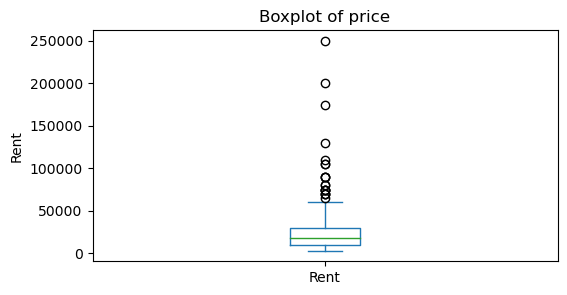

In [63]:
data.Rent.plot(kind='box',title='Boxplot of price',ylabel='Rent',figsize=(6,3))

* There are outliers in Rent column.

In [64]:
data['Square_feets'].describe(),data['Square_feets'].skew(),data['Square_feets'].kurtosis()

(count     569.000000
 mean     1017.729350
 std       760.548781
 min        70.000000
 25%       500.000000
 50%       850.000000
 75%      1300.000000
 max      6480.000000
 Name: Square_feets, dtype: float64,
 2.15762483272752,
 8.175397348956231)

<Axes: ylabel='Density'>

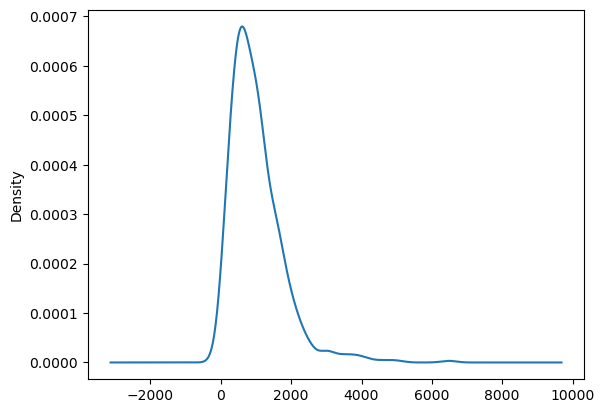

In [65]:
data.Square_feets.plot(kind='density')

In [66]:
data['Bhk'].describe(),data['Bhk'].skew(),data['Bhk'].kurtosis()

(count    569.000000
 mean       1.831283
 std        0.873921
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        2.000000
 max        4.000000
 Name: Bhk, dtype: float64,
 0.6360962890276481,
 -0.6804932200048319)

<Axes: ylabel='Frequency'>

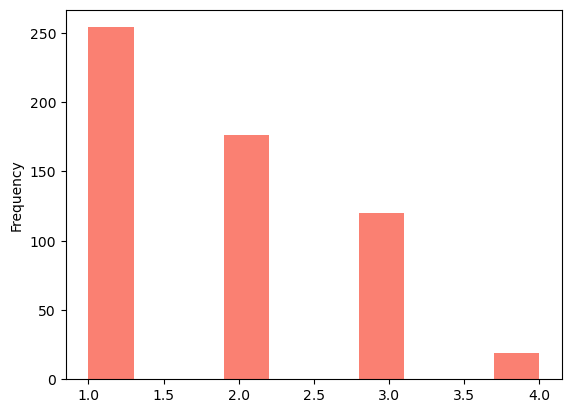

In [67]:
data.Bhk.plot(kind = 'hist',color = 'Salmon')

In [68]:
data['Bathroom'].describe(),data['Bathroom'].skew(),data['Bathroom'].kurtosis()

(count    569.000000
 mean       1.815466
 std        1.484440
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        2.000000
 max       30.000000
 Name: Bathroom, dtype: float64,
 12.375014332694931,
 229.03776375136792)

<Axes: ylabel='Density'>

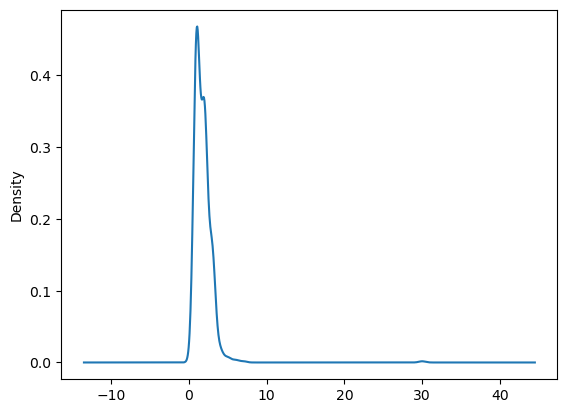

In [69]:
data.Bathroom.plot(kind='density')

In [70]:
data['Deposit'].describe(),data['Deposit'].skew(),data['Deposit'].kurtosis()

(count    5.690000e+02
 mean     5.762759e+04
 std      1.141913e+05
 min      0.000000e+00
 25%      1.600000e+04
 50%      3.200000e+04
 75%      6.000000e+04
 max      1.800000e+06
 Name: Deposit, dtype: float64,
 9.027813232910963,
 111.5052864058755)

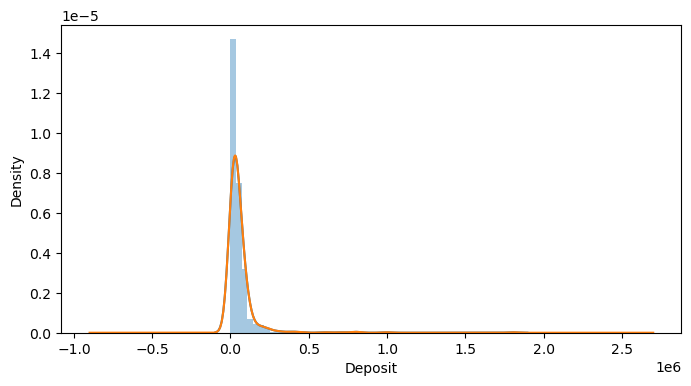

In [71]:
plt.figure(figsize=(8, 4))
sns.distplot(data['Deposit'])
data['Deposit'].plot(kind = 'density')
plt.show()

**Bi-Variate analysis on N-N**

**Numerical to Numerical**

In [72]:
data.head()

,Rent,Location,Square_feets,Bhk,Furnish,Bathroom,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,25000,hyderabad,800,2,semi,2,apartment,50000,above_3_years,no,yes,bike_and_car
1,12000,hyderabad,1100,2,unfurnished,2,apartment,24000,above_5_years,no,yes,bike
2,89998,hyderabad,2810,3,semi,4,apartment,1,above_1_year,no,yes,bike_and_car
3,20000,hyderabad,1080,2,semi,2,apartment,60000,10_years,no,yes,car
4,6500,hyderabad,750,1,unfurnished,1,independent house_villa,6500,above_1_year,yes,yes,bike


In [73]:
data[['Square_feets', 'Rent']].corr()

,Square_feets,Rent
Square_feets,1.000000,0.758215
Rent,0.758215,1.000000


<Axes: xlabel='Square_feets', ylabel='Rent'>

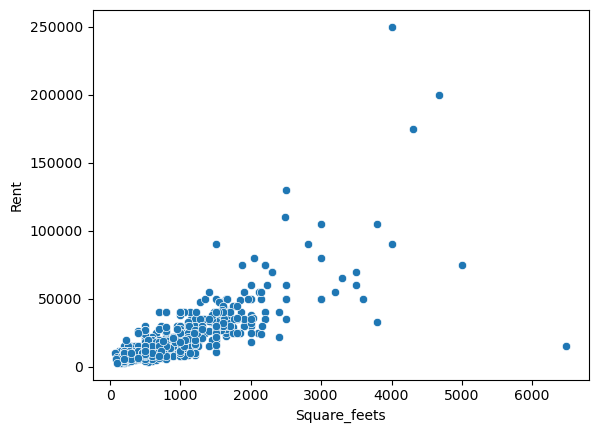

In [74]:
sns.scatterplot(data, x='Square_feets', y='Rent')

In [75]:
data[['Bhk', 'Rent']].corr()

,Bhk,Rent
Bhk,1.000000,0.664883
Rent,0.664883,1.000000


<Axes: xlabel='Bhk', ylabel='Rent'>

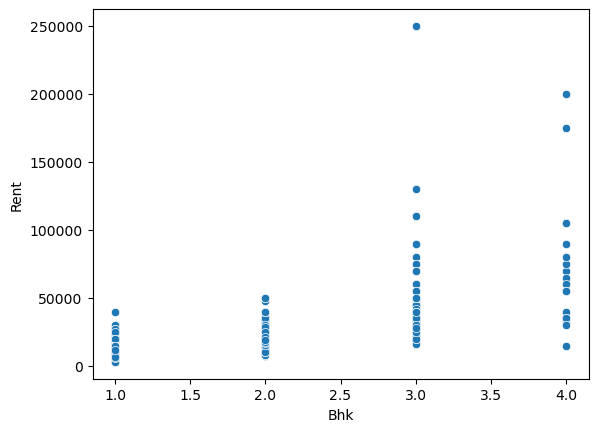

In [76]:
sns.scatterplot(data, x ='Bhk', y ='Rent')

In [77]:
data[['Bathroom', 'Rent']].corr()

,Bathroom,Rent
Bathroom,1.000000,0.407343
Rent,0.407343,1.000000


<Axes: xlabel='Bathroom', ylabel='Rent'>

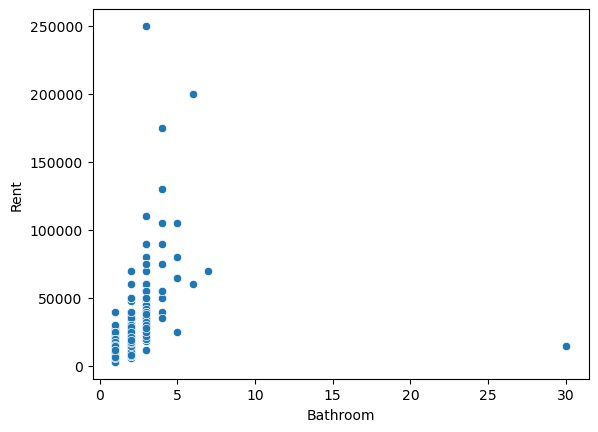

In [78]:
sns.scatterplot(data, x ='Bathroom', y ='Rent')

In [79]:
data[['Deposit', 'Rent']].corr()

,Deposit,Rent
Deposit,1.000000,0.573513
Rent,0.573513,1.000000


<Axes: xlabel='Deposit', ylabel='Rent'>

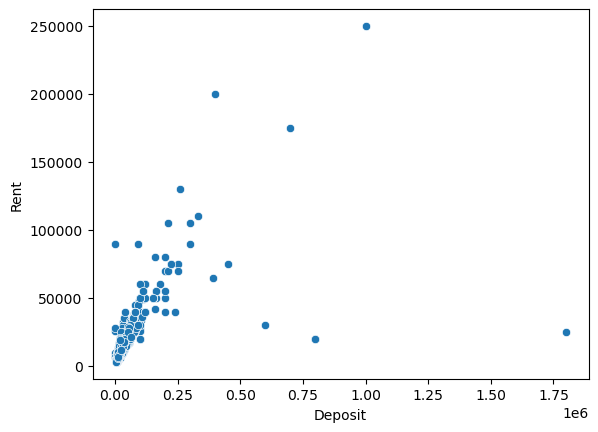

In [80]:
sns.scatterplot(data, x ='Deposit', y ='Rent')

**Numerical - categorical**

In [81]:
data.head(2)

,Rent,Location,Square_feets,Bhk,Furnish,Bathroom,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,25000,hyderabad,800,2,semi,2,apartment,50000,above_3_years,no,yes,bike_and_car
1,12000,hyderabad,1100,2,unfurnished,2,apartment,24000,above_5_years,no,yes,bike


In [82]:
((data.groupby("Furnish")['Rent'].mean()/len(data))*100).sort_values(ascending  = False)

Furnish
full           6131.810193
semi           4691.263385
unfurnished    2765.170155
Name: Rent, dtype: float64

<Axes: ylabel='Furnish'>

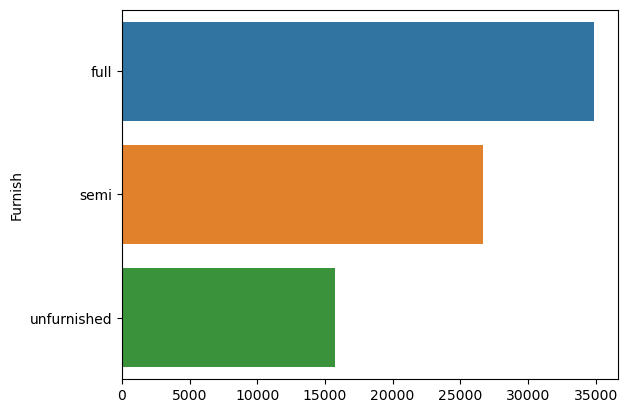

In [83]:
sns.barplot(y = data.groupby('Furnish')['Rent'].mean().sort_values(ascending=False).index[0:3],
            x = data.groupby('Furnish')['Rent'].mean().sort_values(ascending=False).values[0:3],orient ='h')

In [84]:
((data.groupby("Location")['Rent'].mean()/len(data))*100).sort_values(ascending  = False)

Location
hyderabad      5880.191857
kondapur       5230.228471
madhapur       4526.344809
kukatpally     4224.956063
ameerpet       3828.028380
hafeezpet      3458.699473
uppal          1827.065026
Name: Rent, dtype: float64

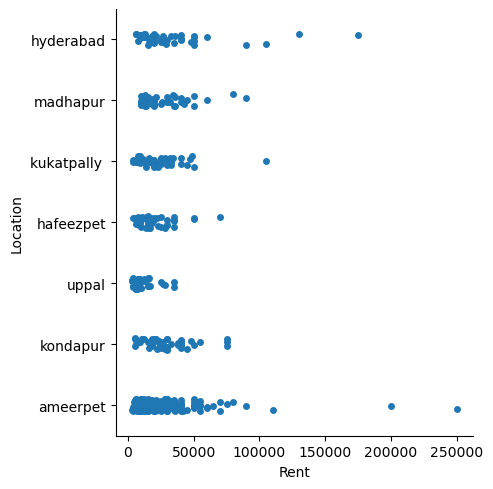

In [85]:
sns.catplot(y='Location', x ='Rent', data = data, orient='h')

In [86]:
((data.groupby("Property_type")['Rent'].mean()/len(data))*100).sort_values(ascending  = False)

Property_type
gated community            13055.485815
apartment                   4204.050504
independent house_villa     3268.023716
Name: Rent, dtype: float64

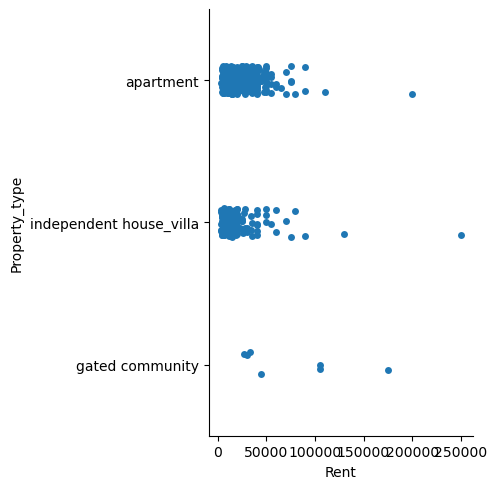

In [87]:
sns.catplot(y='Property_type', x ='Rent', data = data, orient='h')

**Categorical to Categorical**

In [88]:
data.head(2)

,Rent,Location,Square_feets,Bhk,Furnish,Bathroom,Property_type,Deposit,Property_age,Gated_security,Nonveg_allowed,Parking
0,25000,hyderabad,800,2,semi,2,apartment,50000,above_3_years,no,yes,bike_and_car
1,12000,hyderabad,1100,2,unfurnished,2,apartment,24000,above_5_years,no,yes,bike


In [89]:
pd.crosstab(data.Location,data.Furnish, margins=True)

Furnish,full,semi,unfurnished,All
Location,,,,
ameerpet,27,80,163,270
hafeezpet,11,22,17,50
hyderabad,10,24,14,48
kondapur,18,18,14,50
kukatpally,5,21,24,50
madhapur,23,16,12,51
uppal,6,13,31,50
All,100,194,275,569


<Axes: xlabel='count', ylabel='Location'>

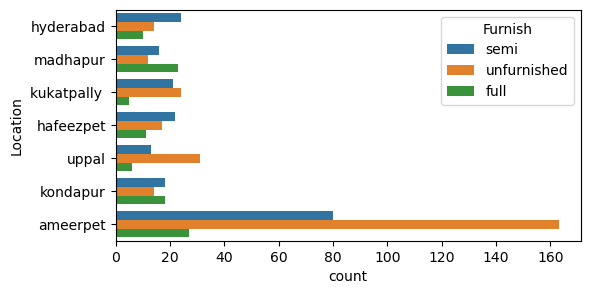

In [90]:
plt.figure(figsize=(6, 3))
sns.countplot(y='Location', hue='Furnish', data = data)

In [91]:
pd.crosstab(data.Location,data.Property_type, margins=True)

Property_type,apartment,gated community,independent house_villa,All
Location,,,,
ameerpet,162,0,108,270
hafeezpet,38,0,12,50
hyderabad,27,4,17,48
kondapur,44,0,6,50
kukatpally,33,3,14,50
madhapur,46,0,5,51
uppal,30,0,20,50
All,380,7,182,569


<Axes: xlabel='count', ylabel='Location'>

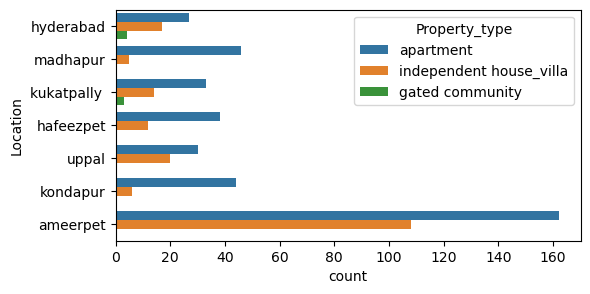

In [92]:
plt.figure(figsize=(6, 3))
sns.countplot(y='Location', hue='Property_type', data = data)

### Overall Insights on data
#### The provided Exploratory Data Analysis (EDA), here are several insights derived from the analysis of the House_Rental dataset:

### Predictive Modelling<a id='pm'>
[Back To Top](#menu)

#### Predictive Modeling on Discount Data
    
* Above data will be given to a machine learning model , where the model will be trained on column data Price with other column data and predicts the future Price for given FlightFares.
    
* predictive modeling is sending data to a algorithm as input columns(x) along with one output column data (y), training y data with x
    
    model: y~x -> y = f(x)+e

### 3. X & y<a id='xy'>

[Back to Top](#menu)

**3.1 Input (x) and output(y) column for modeling from data**

In [ ]:
data.head(2)

We are predicting the Price values, so the ouput column will be Price, and remaining are input columns

In [ ]:
X=data.drop("Rent",axis=1) # Dropping the price column
y=data['Rent']

In [ ]:
X.head()

In [ ]:
y.head()

### 4. Feature Engineering (selecting proper x data for modeling)<a id='fsox'>
   
[Back to Top](#menu)

* Feature selection/Deletion

The above step can be done through the help of EDA and Business decisions

* Feature Modification (Changing the Values)
* Feature Generation (Creating New Features)

The above steps already taken in Data Validation

In [ ]:
X.columns

**4.1 Feature Selection/Deletion**

All the Columns are given equal importance and considered as input columns 

**4.2 Feature Modification/Generation**

* We have done some necessary feature modification in Validation Step
* We will be also doing some necessary steps in data pre-processing

### 5. Train-Test Split <a id='tts'>
   
[Back to Top](#menu)

* Dividing Data (x,y) into train and test (Data Validation)

* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [ ]:
## modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

In [ ]:
#reset index

Xtrain=Xtrain.reset_index(drop=True)
Xtest=Xtest.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)

xtrain, ytrain data is used for the training predictive model

xtest is used for the predictions , ytest is used for the comparissions

In [ ]:
Xtrain

### 6. Na & Handling  Outliers<a id='nott'>
    
[Back to Top](#menu)
    
**6.1 Replacing Na values**

In [ ]:
Xtrain.head(2)

In [ ]:
Xtest.head(2)

In [ ]:
Xtrain.isnull().sum()

In [ ]:
Xtrain.dtypes

**6.2 Outliers Handling**

**Numeric data which does not fit to col data**

In [ ]:
#Outlier detection

In [ ]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()

In [ ]:
outlier_detect(Xtrain)

In [ ]:
outlier_detect(Xtest)

* The outlier data shown above belongs to col in general, keeping them as it is

#outliers replacement

 ### 7. Data Pre-Processing (xtrain, xtest)<a id='ppxt'>

[Back to Top](#menu)

**7.1 Categorical to Numerical (Encoding)**

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Label Encoding for ordinal
    - lets assume cat column data : platinum, gold, silver
    - ordinal - platinum>gold>silver
                3>2>1
* One hot encodig for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

**Nominal Data Encoding (onehot encoding)**

In x data we have cat cols which can be considered as nominal

**we will be using python sklearn library one hot encoder for converting these columns**

In [ ]:
#Onehot encoding
ohe=OneHotEncoder(handle_unknown='ignore',sparse=True,drop = 'first')

# drop is used remove one onehotencoded column for dummy_variable trap

**Dummy variable Trap**

    The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models.

* Using one hot encoder will remember the data , also it will be used to ignore on the unknown data classes

We will be using the command fit_transform to train and convert the classes into one hot encoding

In [ ]:
Xtrain.head(2)

In [ ]:
Xtrain.iloc[:, [0,7]].head(2)

In [ ]:
Xtrain_ohe=ohe.fit_transform(Xtrain.iloc[:,[0,7]]).toarray()

In [ ]:
Xtrain_ohe=pd.DataFrame(Xtrain_ohe,columns= ohe.get_feature_names_out())

In [ ]:
Xtrain_ohe

In [ ]:
Xtrain_ohe.shape

In [ ]:
Xtest_ohe=ohe.transform(Xtest.iloc[:,[0,7]]).toarray()

In [ ]:
Xtest_ohe=pd.DataFrame(Xtest_ohe,columns=ohe.get_feature_names_out())

In [ ]:
Xtest_ohe.shape

In [ ]:
Xtrain.iloc[:,[1,2,3,4,5,6,8,9,10]]

In [ ]:
Xtrain_ohe.isnull().sum()

In [ ]:
Xtest_ohe.isnull().sum()

In [ ]:
Xtrain=pd.concat([Xtrain.iloc[:,[1,2,3,4,5,6,8,9,10]],Xtrain_ohe],axis=1)

In [ ]:
Xtrain.shape

In [ ]:
Xtest=pd.concat([Xtest.iloc[:,[1,2,3,4,5,6,8,9,10]],Xtest_ohe],axis=1)

In [ ]:
Xtest.shape

In [ ]:
# reseting the indexes
Xtrain=Xtrain.reset_index(drop=True)
Xtest=Xtest.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)

**Label Encoding**

we have 5 columns with Ordinal categorical data.

In [ ]:
Xtrain.Gated_security.unique()

In [ ]:
Xtrain.Furnish.replace({
    'unfurnished':0, 'semi':1,'full':2},inplace=True)

In [ ]:
Xtest.Furnish.replace({
    'unfurnished':0, 'semi':1,'full':2},inplace=True)

In [ ]:
Xtrain.Property_type.replace({
    'apartment':0, 'independent house_villa':1,'gated community':2},inplace=True)

In [ ]:
Xtest.Property_type.replace({
    'apartment':0, 'independent house_villa':1,'gated community':2},inplace=True)

In [ ]:
Xtrain.Parking.replace({
    'none':0, 'bike':1,'car':2, 'bike_and_car':3},inplace=True)

In [ ]:
Xtest.Parking.replace({
    'none':0, 'bike':1,'car':2, 'bike_and_car':3},inplace=True)

In [ ]:
Xtrain.Gated_security.replace({'yes':1,"no":0},inplace=True)

In [ ]:
Xtest.Gated_security.replace({'yes':1,"no":0},inplace=True)

In [ ]:
Xtrain.Nonveg_allowed.replace({'yes':1,"no":0},inplace=True)

In [ ]:
Xtest.Nonveg_allowed.replace({'yes':1,"no":0},inplace=True)

In [ ]:
Xtrain.head(2)

In [ ]:
Xtest.head(2)

**7.2 Scaling Numeric Data (if necessary)**

We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Scaling is not suggested for numerical output column

Scaling is applied based on the model we are using for prediction


**For this data numerical values are in different scales and we are building regression , scaling is suggested**

**We have two scales**

1. Standard Scaler / Standardization (Mostly Suggested)

        x-mean/std 
    
    entire column data can be converted into normal distribution with mean 0 and std 1
    
    
    
2. Normalization

    MinMax Scale

    xi-min(x)/max(x)-min(x)

        data in 0 to 1 range


* We can scale numeric columns when we have huge scale difference if algorithm needed

In [ ]:
Xtrain.head(2)

In [ ]:
Xtrain.describe()

In [ ]:
Xtrain.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
Xtrain.columns

In [ ]:
# Conisdering more than two digit columns
Xtrain.iloc[:, [0,5]]

In [ ]:
Xtrain.iloc[:, [0,5]] = sc.fit_transform(Xtrain.iloc[:, [0,5]])

In [ ]:
Xtest.iloc[:, [0,5]] = sc.transform(Xtest.iloc[:, [0,5]])

In [ ]:
Xtrain.head(2)

In [ ]:
Xtest.head(2)

### 8. Selecting The Predictive Model<a id='mod'>

[Back to Top](#menu)

* y data is a numeric data , we will be using regression algorithms

* Linear Algorithms (when the data is linear to output (having correlation))
    - Linear Regression
    - Polynomial Regression
    - Lasso & Ridge Regression

* Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)
    - RandomForest Regressor
    - Xgboost Regressor
    
Note:
    
* The data is non-linear

**8.1 Importing Libraries and Define Models**

In [ ]:
!pip install xgboost

In [ ]:
#Algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyf = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty

ridge = Ridge(alpha = 5)

# Decision Tree regressor
dt_reg = DecisionTreeRegressor()

# Random Forest regressor

rf_reg = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees

# Support Vector Regressor

sv_reg = SVR(kernel='rbf') # non-linear kernel for non-linear data

# Xgb

xgb_reg = XGBRegressor()

**8.2 Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

**Linear regression**

In [ ]:
Xtrain.head(2)

In [ ]:
# Model Training

mlr.fit(Xtrain, ytrain)

In [ ]:
mlr.coef_,mlr.intercept_

**Polynomial Regression**

In [ ]:
# converting x data to poly features

X_train_poly = polyf.fit_transform(Xtrain)

X_test_poly = polyf.transform(Xtest)

In [ ]:
X_train_poly.shape, X_test_poly.shape

In [ ]:
polyf.get_params()

In [ ]:
# Model Training

poly.fit(X_train_poly,ytrain)

In [ ]:
# params

poly.coef_, poly.intercept_

**Lasso and Ridge**

In [ ]:
# model training

lasso.fit(Xtrain,ytrain),ridge.fit(Xtrain,ytrain)

In [ ]:
lasso.coef_,lasso.intercept_

In [ ]:
ridge.intercept_, ridge.coef_

In [ ]:
# non-linear model training

dt_reg.fit(Xtrain,ytrain),rf_reg.fit(Xtrain,ytrain),sv_reg.fit(Xtrain,ytrain),xgb_reg.fit(Xtrain,ytrain)

**Get parameters**

In [ ]:
dt_reg.get_params()

In [ ]:
rf_reg.get_params()

In [ ]:
sv_reg.get_params()

In [ ]:
xgb_reg.get_params()

**Important features**

In [ ]:
rf_reg.feature_names_in_, rf_reg.feature_importances_

### 9. Model Performance<a id='mp'>

[Back to Top](#menu)
* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For regression we can use these evaluation


Performance Metric | Regression
-------|-----------
**Loss or Error**|MeanSquaredError/RMSE (For both Train and Test)
**Model Score (Evaluation)** | R2score (Coefficient of Determination)
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
--|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

Generating predictions for xtest data

* Using predict method in trained model to get ypredictions on test data
* Comparing ypred values with ytest for loss and performance

In [ ]:
X = pd.concat([Xtrain, Xtest], axis = 0)
y = pd.concat([ytrain, ytest], axis = 0)

**Single Function for all models Evaluation**

In [ ]:
names = ["polynomial Regression",'Multiple Linear Regression',"Lasso Regression",'Ridge regression','Decision Tree','RandomForest Regressor',"Support Vector Regressor", 
         'Xgboost Regressor']
models= {'poly':poly,'mlr':mlr,'Lasso':lasso,'Ridge':ridge,'dt_reg':dt_reg,'rf_reg':rf_reg,'sv_reg':sv_reg,'xgb_reg':xgb_reg}

# Defining empty lists
trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit=[]
crossvalscore = []


In [ ]:
for name, model in models.items():
    if name == 'poly':
        
        # RMSE , R2score   
        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, model.predict(X_train_poly))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, model.predict(X_test_poly))), 2))
        trainscore.append(round(r2_score(ytrain, model.predict(X_train_poly)),2))
        testscore.append(round(r2_score(ytest, model.predict(X_test_poly)),2))
        trscore = r2_score(ytrain, model.predict(X_train_poly))
        tescore = r2_score(ytest, model.predict(X_test_poly))
        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")
        
        # Cross validation

        scores = cross_val_score(models[name], X.iloc[:,0:5], y, cv=3)
        crossvalscore.append(round(scores.mean(),2))
        
    else:
        
        # RMSE, R2score

        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, models[name].predict(Xtrain))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, models[name].predict(Xtest))),2))
        trainscore.append(round(r2_score(ytrain, models[name].predict(Xtrain)),2))
        testscore.append(round(r2_score(ytest, models[name].predict(Xtest)),2))
        trscore = r2_score(ytrain, models[name].predict(Xtrain))
        tescore = r2_score(ytest, models[name].predict(Xtest))
        
        # Bias-Variance Trade off
        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-val score
        
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(),2))

In [ ]:
trainRMSE,testRMSE,trainscore,testscore

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
display(pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit}))


### 10.Real Time Predictions<a id='rtp'>
[BackToTop](#menu)

In [ ]:
data.head(2)

In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()